# 🧠 Tutorial 1.2: Basics on Probability distributions, KL Divergence- Solution
---
## 📘 1. Gaussian Distribution and KL Divergence
This notebook discusses two core ideas in probability and machine learning:
- The **Gaussian (Normal) Distribution**, one of the most fundamental continuous distributions.
- The **Kullback–Leibler (KL) Divergence**, a measure of difference between two probability distributions.

We will explore:
- How Gaussian parameters affect shape and spread.
- Univariate and Multivariate Gaussian distributions.
- How to compute, visualize, and interpret KL divergence between distributions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

## 🏗️ 3. The Gaussian Distribution
A Gaussian (Normal) distribution is defined as:

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

- **μ (mu):** mean — the center of the distribution  
- **σ (sigma):** standard deviation — controls the spread


**TO-DO**
1. Define a distribution of intergers lying between a range [-r,r]
2. Determine the normal distribution for the spread of this values with mean  **μ and standard deviation  **σ
3. Compare the distributions with different values of mean and standard deviation
4. State your findings in short

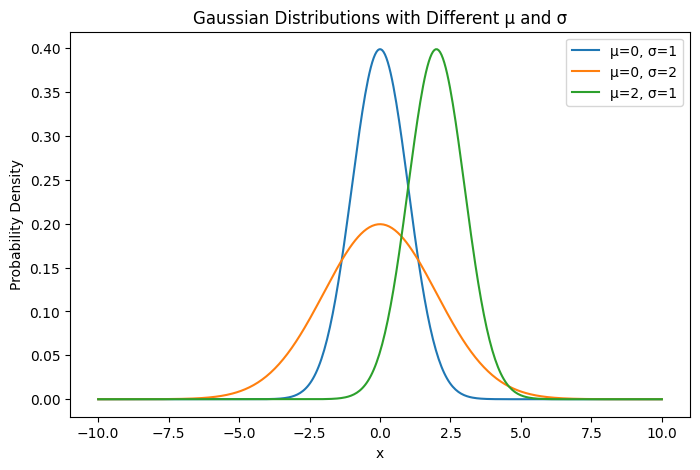

In [ ]:
x = np.linspace(-10, 10, 400)
params = [(0, 1), (0, 2), (2, 1)]
def gaussian_pdf_from_scratch(x, mu, sigma):
  """
  Computes the probability density function (PDF) of a Gaussian distribution from scratch.

  Args:
    x: The value at which to compute the PDF.
    mu: The mean of the Gaussian distribution.
    sigma: The standard deviation of the Gaussian distribution.

  Returns:
    The probability density at x.
  """
  exponent = -((x - mu)**2) / (2 * sigma**2)
  denominator = np.sqrt(2 * np.pi * sigma**2)
  pdf = (1 / denominator) * np.exp(exponent)
  return pdf
plt.figure(figsize=(8,5))
for mu, sigma in params:
    plt.plot(x, gaussian_pdf_from_scratch(x, mu, sigma), label=f"μ={mu}, σ={sigma}")
plt.legend()
plt.title("Gaussian Distributions with Different μ and σ")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()

### 🧩 Probability Computation
Compute the probability that a standard normal variable $X \sim N(0,1)$ falls between -1 and 1.

In [ ]:
prob = norm.cdf(1, 0, 1) - norm.cdf(-1, 0, 1)
print(prob)

0.6826894921370859


## 📊 4. Sampling and Fitting

**TO-DO**
1. Draw random variables from normal distributions
2. Plot the histogram of the data
3. Plot the fitted Gaussian distribution on the data

Estimated mean: 3.04, std: 1.96


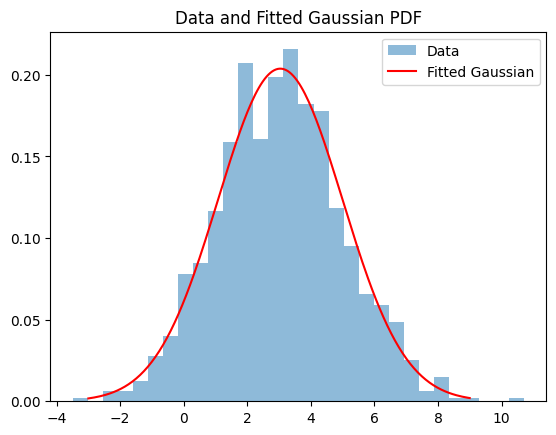

In [ ]:
np.random.seed(42)
data = np.random.normal(loc=3, scale=2, size=1000)

mu_hat = np.mean(data)
sigma_hat = np.std(data)
print(f"Estimated mean: {mu_hat:.2f}, std: {sigma_hat:.2f}")

plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
x = np.linspace(-3, 9, 200)
plt.plot(x, norm.pdf(x, mu_hat, sigma_hat), 'r-', label='Fitted Gaussian')
plt.legend()
plt.title("Data and Fitted Gaussian PDF")
plt.show()

## 🌀 5. Multivariate Gaussian

Until now, we have been working with a one-dimensional Gaussian distribution, also known as a univariate Gaussian. We will explore the cases with distributions with d dimensions

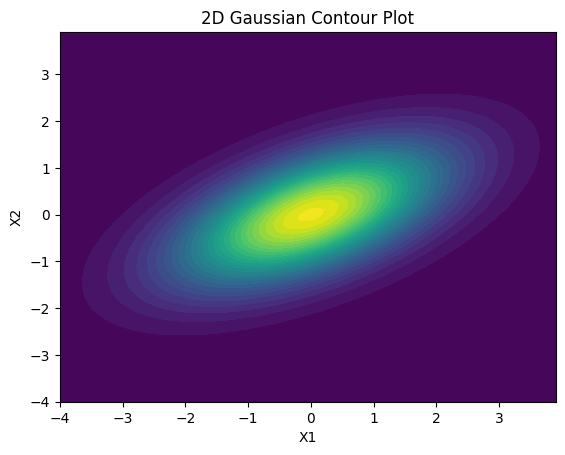

In [ ]:
mean = np.array([0, 0])
cov = np.array([[2, 0.8], [0.8, 1]])

x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov)

plt.contourf(x, y, rv.pdf(pos), levels=30, cmap="viridis")
plt.title("2D Gaussian Contour Plot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## ⚖️ 6. KL Divergence
The **Kullback–Leibler Divergence** measures how one probability distribution differs from another:
$$
D_{KL}(P || Q) = \int p(x) \log \frac{p(x)}{q(x)} dx
$$

Properties:
It’s not symmetric: $D_{KL}(P || Q) \neq D_{KL}(Q || P)$.

In [ ]:
def kl_gaussian(mu0, sigma0, mu1, sigma1):
    term1 = np.log(sigma1 / sigma0)
    term2 = (sigma0**2 + (mu0 - mu1)**2) / (2 * sigma1**2)
    return term1 + term2 - 0.5

kl = kl_gaussian(0, 1, 2, 1)
print(f"KL(N(0,1) || N(2,1)) = {kl:.3f}")

KL(N(0,1) || N(2,1)) = 2.000


### 🧠 Exercise 2: Explore KL Sensitivity

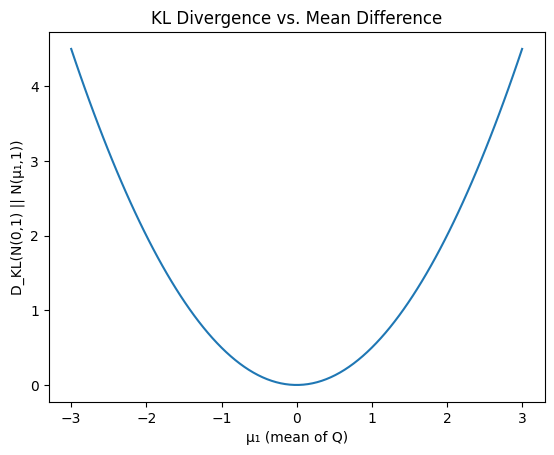

In [ ]:
mus = np.linspace(-3, 3, 100)
kl_values = [kl_gaussian(0, 1, m, 1) for m in mus]

plt.plot(mus, kl_values)
plt.title("KL Divergence vs. Mean Difference")
plt.xlabel("μ₁ (mean of Q)")
plt.ylabel("D_KL(N(0,1) || N(μ₁,1))")
plt.show()

## 🧩 7. Monte Carlo Approximation of KL Divergence

In [ ]:
def kl_monte_carlo(mu0, sigma0, mu1, sigma1, n=10_000):
    x = np.random.normal(mu0, sigma0, n)
    p = norm.pdf(x, mu0, sigma0)
    q = norm.pdf(x, mu1, sigma1)
    return np.mean(np.log(p / q))

approx_kl = kl_monte_carlo(0, 1, 2, 1)
print(f"Monte Carlo KL ≈ {approx_kl:.3f}")

Monte Carlo KL ≈ 2.016


**TO-DO**

1. Show instances where KL-divergence fails to compute dis
2. Can you think of any approximations to compute KL divergence in such intractable cases?

Analytic KL (Gaussian vs Gaussian): 0.4431
Monte Carlo KL (Gaussian vs Gaussian): 0.4428
Monte Carlo KL (Gaussian vs Mixture): 0.9448
No analytic KL for Gaussian vs Mixture: NotImplementedError


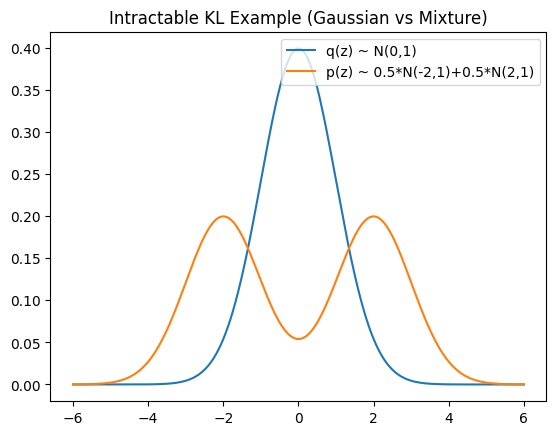

In [ ]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

# Set random seed
torch.manual_seed(0)

# ------------------------------
# 1️⃣ Tractable case: Gaussian vs Gaussian
# ------------------------------

q = dist.Normal(torch.tensor(0.0), torch.tensor(1.0))
p = dist.Normal(torch.tensor(1.0), torch.tensor(2.0))

# Analytic KL (closed form)
kl_analytic = dist.kl_divergence(q, p)
print(f"Analytic KL (Gaussian vs Gaussian): {kl_analytic.item():.4f}")

# Monte Carlo approximation
z = q.sample((100000,))
kl_mc = torch.mean(q.log_prob(z) - p.log_prob(z))
print(f"Monte Carlo KL (Gaussian vs Gaussian): {kl_mc.item():.4f}")

# ------------------------------
# 2️⃣ Intractable case: Gaussian vs Mixture of Gaussians
# ------------------------------

# Mixture of two Gaussians as p(z)
components = [dist.Normal(-2.0, 1.0), dist.Normal(2.0, 1.0)]
weights = torch.tensor([0.5, 0.5])

def log_prob_mixture(z):
    # log-sum-exp trick for numerical stability
    log_probs = torch.stack([c.log_prob(z) + torch.log(w) for c, w in zip(components, weights)])
    return torch.logsumexp(log_probs, dim=0)

# q(z) = Normal(0, 1)
q = dist.Normal(0.0, 1.0)
z = q.sample((100000,))
kl_estimate = torch.mean(q.log_prob(z) - log_prob_mixture(z))
print(f"Monte Carlo KL (Gaussian vs Mixture): {kl_estimate.item():.4f}")

# Try to use analytic form (will fail)
try:
    p_mixture = dist.MixtureSameFamily(dist.Categorical(weights), dist.Normal(torch.tensor([-2.0, 2.0]), torch.tensor([1.0, 1.0])))
    print(dist.kl_divergence(q, p_mixture))  # PyTorch doesn't support this!
except Exception as e:
    print(f"No analytic KL for Gaussian vs Mixture: {type(e).__name__}")

# ------------------------------
# 3️⃣ Visualization
# ------------------------------
import numpy as np

xs = torch.linspace(-6, 6, 400)
p_vals = torch.exp(log_prob_mixture(xs))
q_vals = torch.exp(q.log_prob(xs))

plt.plot(xs, q_vals, label='q(z) ~ N(0,1)')
plt.plot(xs, p_vals, label='p(z) ~ 0.5*N(-2,1)+0.5*N(2,1)')
plt.legend()
plt.title("Intractable KL Example (Gaussian vs Mixture)")
plt.show()


## 1️⃣ Why Reparameterization?

We often want to optimize an expectation of the form:
$$ \nabla_\phi \mathbb{E}_{z \sim q_\phi(z)}[f(z)] $$

But if we sample \(z\) directly from \(q_\phi(z)\), gradients can't flow through the sampling operation.

💡 **Idea:** Express \(z\) as a deterministic function of a parameter-free noise variable \(\epsilon\):
$$ z = \mu_\phi + \sigma_\phi \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I) $$

Now, gradients can flow through \(\mu_\phi\) and \(\sigma_\phi\) via backpropagation.

## 2️⃣ Visualizing Gaussian Sampling vs Reparameterization

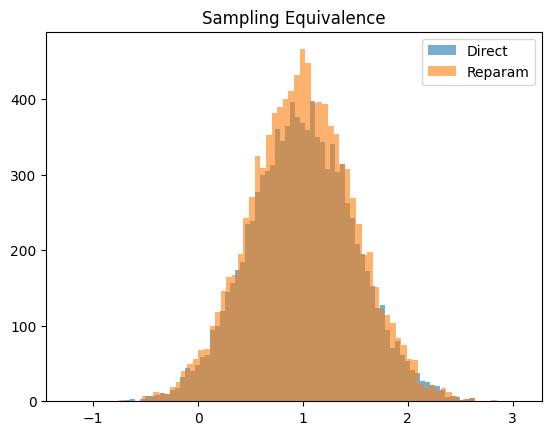

In [ ]:
mu, sigma = 1.0, 0.5
n = 10000

# Direct sampling
direct = np.random.normal(mu, sigma, n)

# Reparameterized sampling
eps = np.random.randn(n)
reparam = mu + sigma * eps

plt.hist(direct, bins=80, alpha=0.6, label='Direct')
plt.hist(reparam, bins=80, alpha=0.6, label='Reparam')
plt.legend()
plt.title('Sampling Equivalence')
plt.show()

** TO-DO**

1. What happens if we intend to calculate the gradients of random variable sampled from a normal distribution?
2. Compare it with the gradients calculated after using reparameterization trick.

In [ ]:
import torch
torch.manual_seed(0)

# Parameters
mu = torch.tensor(0.5, requires_grad=True)
log_sigma = torch.tensor(0.1, requires_grad=True)

# Reparameterized sample
eps = torch.randn(1000)
sigma = torch.exp(log_sigma)
z = mu + sigma * eps

loss = (z ** 2).mean()
loss.backward()
print('Reparam grads -> mu:', mu.grad.item(), ' log_sigma:', log_sigma.grad.item())

# Naive sampling (breaks gradient flow)
mu2 = torch.tensor(0.5, requires_grad=True)
sigma2 = torch.tensor(1.0, requires_grad=True)
#sigma2 = torch.exp(log_sigma2)
print(sigma, mu2)
z2 = torch.normal(mu2,sigma2)
loss2 = (z2 ** 2).mean()
loss2.backward()
print('Naive grads -> mu:', mu2.grad, ' log_sigma:', log_sigma2.grad)

Reparam grads -> mu: 1.0639194250106812  log_sigma: 2.616429567337036
tensor(1.1052, grad_fn=<ExpBackward0>) tensor(0.5000, requires_grad=True)
Naive grads -> mu: tensor(0.)  log_sigma: None
